In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.5.1+cu121
12.1
True
NVIDIA GeForce RTX 4060 Laptop GPU


In [8]:
from ultralytics import YOLO
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


image 1/1 d:\Learning\AI_Indonesia\project_2\images\0015.jpg: 416x640 17 persons, 1 handbag, 55.4ms
Speed: 2.1ms preprocess, 55.4ms inference, 13.5ms postprocess per image at shape (1, 3, 416, 640)


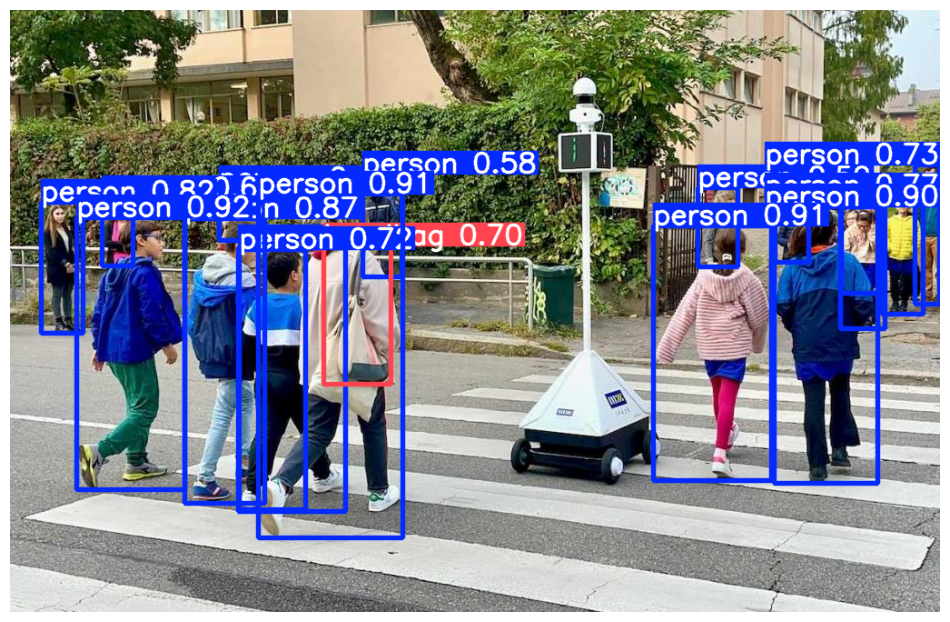

In [10]:
# Load a pre-trained YOLOv10n model
model = YOLO("yolov9s.pt")

# Perform object detection on an image
results = model("images/0015.jpg")

# Display the results
image = results[0].plot()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# langsung di Notebook
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [1]:
from roboflow import Roboflow


rf = Roboflow(api_key="LmLPRgcH2ELmCE79tfSz")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(8)
dataset = version.download("yolov9", location="dataset_yolov9")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset_yolov9 in yolov9:: 100%|██████████| 34814/34814 [00:14<00:00, 2335.62it/s]


In [3]:
import ultralytics
print(ultralytics.__version__)

8.3.220


In [15]:
from ultralytics import YOLO

# 1️⃣ Load model
model = YOLO("yolov9s.pt")

# 2️⃣ Train
results = model.train(
    data="dataset_yolov9/data.yaml",  # path YAML
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,  # otomatis ke GPU 0
    workers=8,
    project="runs/train",
    name="yolov9_person",
    pretrained=True,
    optimizer="Adam",
    lr0=1e-4,
)

New https://pypi.org/project/ultralytics/8.3.221 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.220  Python-3.11.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_yolov9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov9_person2, nbs

In [14]:
import os

print(os.getcwd())  # pastikan di D:\Learning\AI_Indonesia\project_2
print(os.path.exists("dataset_yolov9/train/images"))
print(os.path.exists("dataset_yolov9/valid/images"))

d:\Learning\AI_Indonesia\project_2
True
True
